In [3]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [10]:
# load CarData.csv dataset
dataset = pd.read_csv('Exercise-CarData.csv');
print('Dataset: ',dataset)

Dataset:        Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


In [ ]:
# Data transformation 

# Performing scaling price and age
X_new = dataset.iloc[:,[1,2]]
# print(X_new)
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_new)
print("Scaled X \n\n",X_scaler)

# Performing standardization price and age
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\n Standardized X \n\n",X_std)


Scaled X 

 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


 Standardized X 

 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


In [28]:
# Handling Categorial data

# Sperating columns
dataset1 = pd.read_csv('Exercise-CarData.csv');
# droping the rows which has null values
dataset1 = dataset1.drop(['KM','HP','MetColor','Automatic','CC','Doors','Weight'],axis=1)
# print(dataset1)
df = pd.DataFrame(dataset1)
df1 = df.dropna(how='any')
X = df1.iloc[:,1:5].values
# print(X)

# Applying label encoder on FuelType
le = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])
# print(X)

# # using dummy variables to create one column for each FuelType
dummy = pd.get_dummies(dataset1['FuelType'])
# print("\n\nDummy\n",dummy)
dataset1 = dataset1.drop(['FuelType'],axis=1)
dataset1 = pd.concat([dataset1,dummy],axis = 1)
print("\n\nFinal Data\n",dataset1.head())

#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(dataset.FuelType.values.reshape(-1,1)).toarray()
# print(x)





Final Data
    Unnamed: 0  Price   Age  CNG  Diesel  Petrol
0           0  13500  23.0    0       1       0
1           1  13750  23.0    0       1       0
2           2  13950  24.0    0       1       0
3           3  14950  26.0    0       1       0
4           4  13750  30.0    0       1       0


In [33]:
# Handling missing values

dataset2 = pd.read_csv('Exercise-CarData.csv')
# print(dataset2.head(20))

# removing row with all null values
dataset2.dropna(axis=0,how='all',inplace=True)
# print(dataset2)

# removing row with any null values
# dataset2.dropna(axis=0,how='any',inplace=True)
# print(dataset2)

# updating the null value with mean value of that column
updated_df = dataset2
updated_df['Age'] = updated_df['Age'].fillna(updated_df['Age'].mean())
# updated_df.info()

# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")
new_X = dataset2.iloc[:,1:3].values
# print(new_X)
imputer = imputer.fit(new_X[:,1:3])
new_X[:,1:3] = imputer.transform(new_X[:,1:3])
print(new_X)

[[13500.            23.        ]
 [13750.            23.        ]
 [13950.            24.        ]
 ...
 [ 8500.            55.67215569]
 [ 7250.            70.        ]
 [ 6950.            76.        ]]
[[13500.            23.        ]
 [13750.            23.        ]
 [13950.            24.        ]
 ...
 [ 8500.            55.67215569]
 [ 7250.            70.        ]
 [ 6950.            76.        ]]


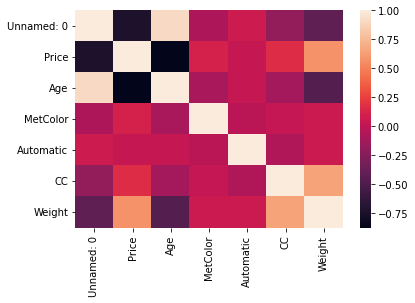

In [35]:
# feature selection correlation

import numpy as np
import pandas as pd
import seaborn as sns

data3=pd.read_csv('Exercise-CarData.csv')
# print(data3)

# Generating the correlation matrix
corr=data3.corr()
corr.head()

# Generating the correlation heatmap
sns.heatmap(corr)

# Next, we compare the correlation between features and remove one of two features 
# that have a correlation higher than 0.9

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
